In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_380.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_517.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_364.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_258.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_237.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_476.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_563.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_159.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_464.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_518.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_141.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_398.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_442.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_443.jpg
/kaggl

In [16]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt

In [17]:
dataset_path = '/kaggle/input/cats-and-dogs-image-classification/train'

In [18]:
image_size = (128, 128)

In [19]:
def load_images_and_labels(image_dir, image_size=(128, 128)):
    images = []
    labels = []
    original_images = []  
    for label, class_name in enumerate(['cats', 'dogs']):
        class_path = os.path.join(image_dir, class_name)
        if not os.path.exists(class_path):
            print(f"Directory {class_path} does not exist.")
            continue
        for file in tqdm(os.listdir(class_path), desc=f"Loading {class_name} images"):
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img_resized = cv2.resize(img, image_size)
                images.append(img_resized.flatten())  
                labels.append(label)
                original_images.append(img_resized)  
            else:
                print(f"Failed to read image {img_path}")
    return np.array(images), np.array(labels), np.array(original_images)

In [20]:
X, y, original_images = load_images_and_labels(dataset_path)

Loading dogs images: 100%|██████████| 278/278 [00:01<00:00, 155.01it/s]


In [21]:
print(f"Images shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Images shape: (557, 49152)
Labels shape: (557,)


In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test, original_images_train, original_images_test = train_test_split(X, y, original_images, test_size=0.2, random_state=42)

In [24]:
model = svm.SVC(kernel='linear') 
model.fit(X_train, y_train)


SVC(kernel='linear')

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")


Classification Report:
              precision    recall  f1-score   support

         Cat       0.60      0.58      0.59        64
         Dog       0.46      0.48      0.47        48

    accuracy                           0.54       112
   macro avg       0.53      0.53      0.53       112
weighted avg       0.54      0.54      0.54       112

Accuracy Score: 0.5357142857142857


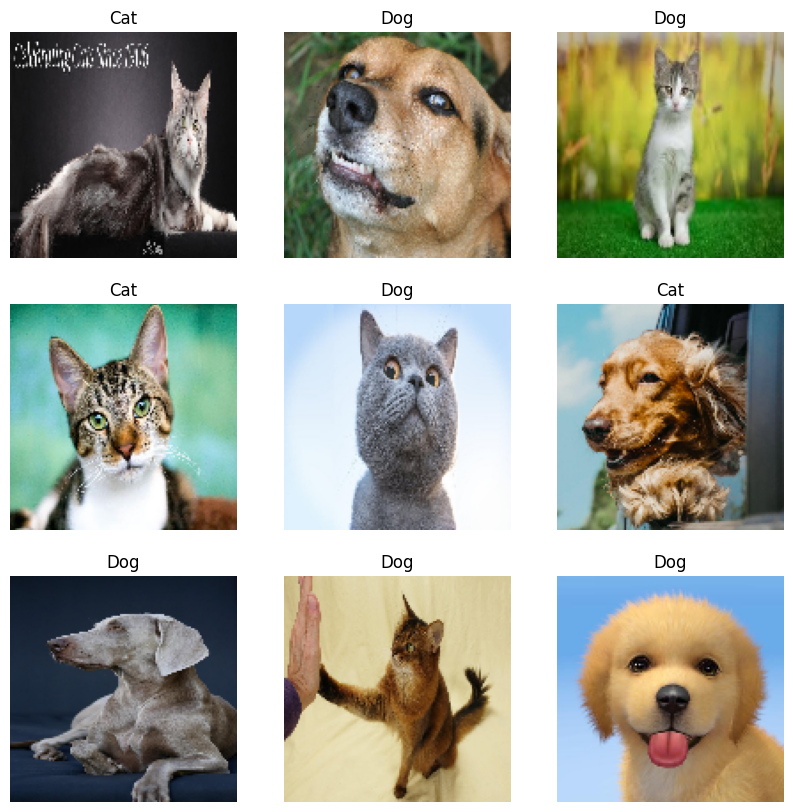

In [27]:
plt.figure(figsize=(10, 10))
for i in range(min(9, len(original_images_test))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(original_images_test[i], cv2.COLOR_BGR2RGB)) 
    plt.title('Cat' if y_pred[i] == 0 else 'Dog')
    plt.axis('off')
plt.show()
